<a href="https://colab.research.google.com/github/FUB-HCC/hcds-summer-2022/blob/main/Assignment_1_IFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Tasks
1. Perform an exploratory data analysis on the Cleveland heart disease dataset described
above. Reuse your code from the in-class project. You can find code snippets for more plot
types here: https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee
a. Add at least two new plot types from the above source (e.g. pairplot and heatmap
from the seaborn library).
b. You will need to deal with missing data. For simplicity you can delete all rows with
missing data. If you prefer to impute the missing values, this is even better.
2. Train at least three classifiers to diagnose heart disease based on the available data and
compare them visually in a grouped bar chart with regard to accuracy, sensitivity and
specificity. Create a confusion matrix for each classifier and plot them as a heatmap.
3. Repeat the steps of the previous task using as class labels only “heart disease vs. no heart
disease”. Why does this change make sense?
4. Create and plot ROC curves for your classifiers.
5. Start setting up the report for the Data Science block and start adding results of this week’s
project. You find the requirements for the report in the slides from the first session. It is only
due at the end of the Data Science block.

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
%cd /content

/content


In [25]:
%matplotlib inline
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Analysis

In [27]:
heart_disease = pd.read_csv('/content/processedWithHeader.cleveland.data', sep=",")
heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [28]:
#removing missing values

missing = [87,166,192,266,287,302]
heart_disease= heart_disease.drop(missing,axis=0)








*Visualization with Boxplot*

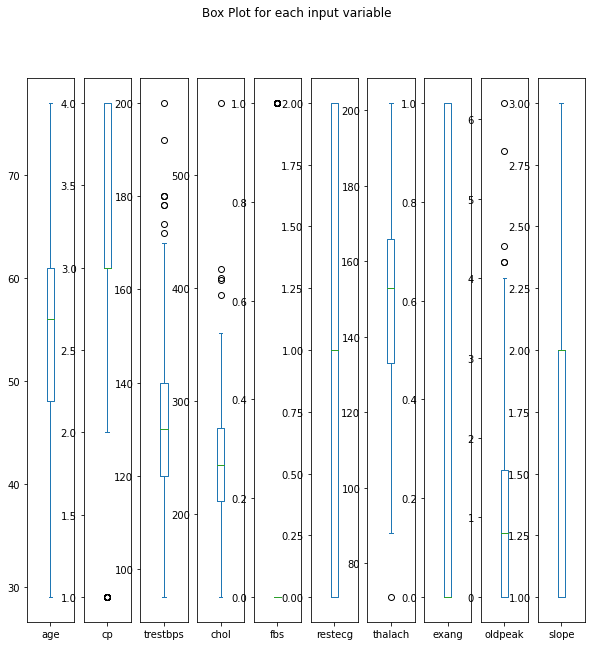

In [32]:
drop=['sex' ,'goal']
heart_disease.drop(drop, axis=1).plot(kind='box', subplots=True, 
                                        sharex=False, sharey=False, figsize=(10,10), 
                                        title='Box Plot for each input variable')
plt.savefig('heart_box')
plt.show()

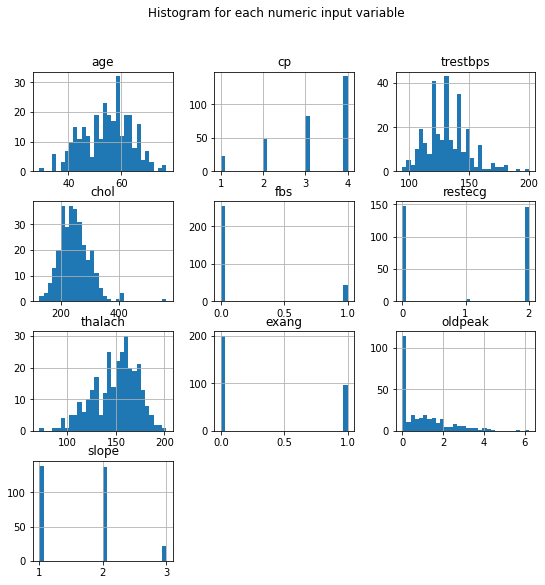

In [33]:
heart_disease.drop(drop ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('heart_hist')
plt.show()

In [34]:
#statistical summary

heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,goal
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


# Classifiers and ROC Curves

In [ ]:
#Create training set and apply scaling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
feature_names = np.array(heart_disease.columns)
feature_names= np.delete(feature_names,13)

X = heart_disease[feature_names]
y = heart_disease['goal']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print(X_train)
print(X_test)

print(y_train)
print(y_test)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
160  46.0  1.0  2.0     101.0  197.0  1.0      0.0    156.0    0.0      0.0   
91   62.0  0.0  4.0     160.0  164.0  0.0      2.0    145.0    0.0      6.2   
273  71.0  0.0  4.0     112.0  149.0  0.0      0.0    125.0    0.0      1.6   
158  60.0  1.0  4.0     140.0  293.0  0.0      2.0    170.0    0.0      1.2   
201  64.0  0.0  4.0     180.0  325.0  0.0      0.0    154.0    1.0      0.0   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
254  43.0  1.0  4.0     115.0  303.0  0.0      0.0    181.0    0.0      1.2   
195  67.0  1.0  4.0     100.0  299.0  0.0      2.0    125.0    1.0      0.9   
118  63.0  1.0  4.0     130.0  330.0  1.0      2.0    132.0    1.0      1.8   
47   50.0  1.0  4.0     150.0  243.0  0.0      2.0    128.0    0.0      2.6   
174  64.0  1.0  4.0     145.0  212.0  0.0      2.0    132.0    0.0      2.0   

     slope   ca thal  
160    1.0  0.0  7.0  
91   

**Classifier 1: Logistic Regression**

Accuracy of Logistic regression classifier on training set: 0.66
Accuracy of Logistic regression classifier on test set: 0.55


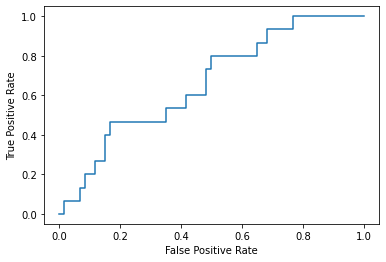

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

#define metrics
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr_logreg, tpr_logreg, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label=1)

#create ROC curve
plt.plot(fpr_logreg,tpr_logreg)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Classifier 2: K-Nearest Neighbor**


Accuracy of K-NN classifier on training set: 0.68
Accuracy of K-NN classifier on test set: 0.55


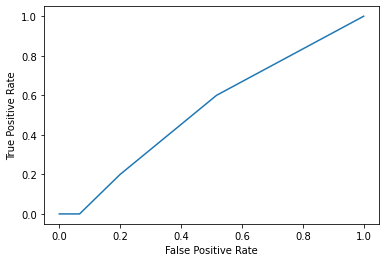

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

#define metrics
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label=1)

#create ROC curve
plt.plot(fpr_knn,tpr_knn)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Classifier 3: Decision Tree**


Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.52


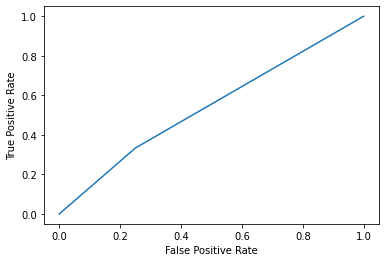

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#define metrics
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr_clf, tpr_clf, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label=1)

#create ROC curve
plt.plot(fpr_clf,tpr_clf)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Comparison of classifiers with grouped bar chart

**Accuracy**

In [ ]:
#scores

0.5466666666666666

**Specifity**

In [ ]:
#true negative



**Sensitivity**

In [ ]:
#true positive



# Repeating Analysis with binary predictor

In [ ]:
#changing goal parameter to binary
y_train=y_train.replace(not 0,1)
y_test=y_test.replace(not 0,1)

#print(y_test)

**Logistic regression**

Accuracy of Logistic regression classifier on training set: 0.85
Accuracy of Logistic regression classifier on test set: 0.84


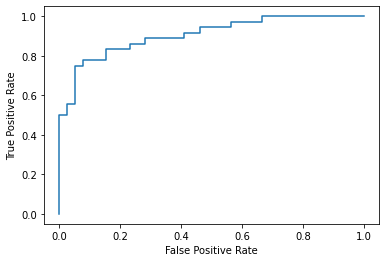

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

#define metrics
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr_logreg, tpr_logreg, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label=1)

#create ROC curve
plt.plot(fpr_logreg,tpr_logreg)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**K-nearest neighbor**

Accuracy of K-NN classifier on training set: 0.84
Accuracy of K-NN classifier on test set: 0.73


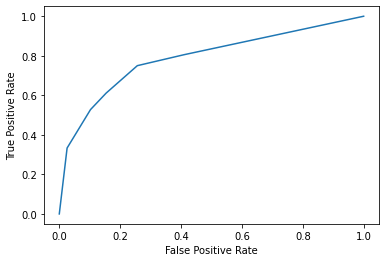

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

#define metrics
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label=1)

#create ROC curve
plt.plot(fpr_knn,tpr_knn)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Decision tree**

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.77


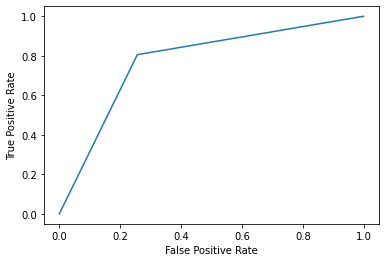

In [ ]:
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#define metrics
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr_clf, tpr_clf, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label=1)

#create ROC curve
plt.plot(fpr_clf,tpr_clf)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()